### Задание

Создайте нейронную сеть, распознающую рукописные цифры. Используя подготовленную базу и шаблон ноутбука, нормируйте данные, создайте и обучите сверточную сеть.

**Параметры модели:** сеть должна содержать минимум 2 сверточных слоя; полносвязные слои; слои подвыборки, нормализации, регуляризации по 1 шт.

**Гиперпараметры обучения:** функция ошибки - категориальная кроссэнтропия, оптимизатор - Adam с шагом обучения одна тысячная, размер батча - 128, количество эпох 15, детали обучения - отображать.

**В конце** выведите график обучения: доли верных ответов на обучающей и проверочной выборках.


In [1]:
# загрузка датасета MNIST

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
# Подключение утилит для to_categorical
from tensorflow.keras import utils

# Подключение библиотеки для работы с массивами
import numpy as np

# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt

# Подключение библиотеки для генерации случайных чисел
import random

# Подключение класса для работы с изображением
from PIL import Image

# Основные слои
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# Основа для создания последовательной модели
from tensorflow.keras.models import Sequential
# Оптимизатор
from tensorflow.keras.optimizers import Adam

# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

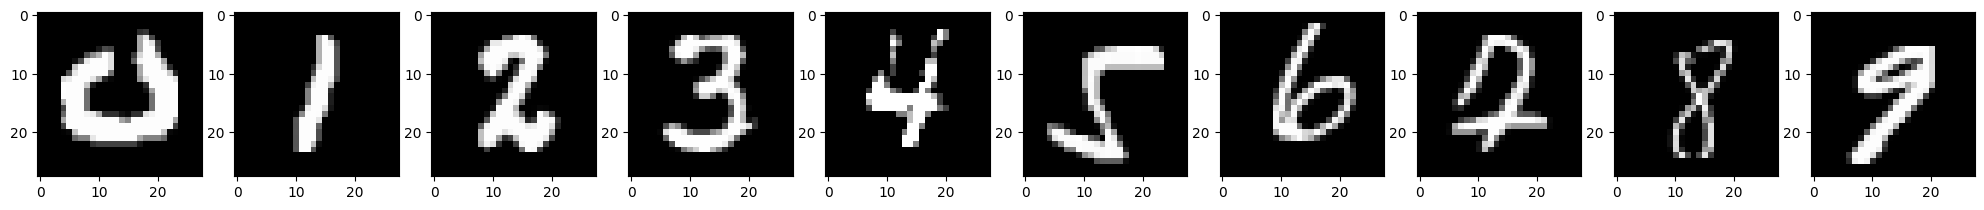

In [ ]:
# вывод изображений каждого класса для ознакомления с датасетом

fig, axs = plt.subplots(1, 10, figsize=(25,3)) # создаем полотно для 10 графиков с размером 25 на 3
for i in range(10):
  label_indexes = np.where(y_train == i)[0] # получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # выбирает случайный индекс из списка созданного выше
  img = x_train[index] # выбираем из x_train нужное положение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # выводим изображение

plt.show()

In [3]:
# добавляем размерность массиву mnist, чтобы сеть поняла что это чб
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# посмотрим форматы выборок перед обучением
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


In [4]:
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [21]:
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
# Второй сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
# Слой преобразования многомерных данных в одномерные
model.add(Flatten())
# Промежуточный полносвязный слой
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.3))
# Промежуточный полносвязный слой
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
# Выходной полносвязный слой с количеством нейронов по количесту классов
model.add(Dense(10, activation='softmax'))

In [22]:
model.compile(optimizer=Adam(0.0001) ,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [23]:
history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=15,
                    verbose=1)

Epoch 1/15
375/375 [==============================] - 32s 72ms/step - loss: 0.2048 - accuracy: 0.9354 - val_loss: 0.4871 - val_accuracy: 0.9840
Epoch 2/15
375/375 [==============================] - 26s 69ms/step - loss: 0.0601 - accuracy: 0.9813 - val_loss: 0.0485 - val_accuracy: 0.9856
Epoch 3/15
375/375 [==============================] - 26s 70ms/step - loss: 0.0384 - accuracy: 0.9876 - val_loss: 0.0374 - val_accuracy: 0.9892
Epoch 4/15
375/375 [==============================] - 25s 68ms/step - loss: 0.0268 - accuracy: 0.9918 - val_loss: 0.0358 - val_accuracy: 0.9902
Epoch 5/15
375/375 [==============================] - 25s 68ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0311 - val_accuracy: 0.9915
Epoch 6/15
375/375 [==============================] - 26s 70ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0345 - val_accuracy: 0.9898
Epoch 7/15
375/375 [==============================] - 26s 70ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0325 - val_accuracy:

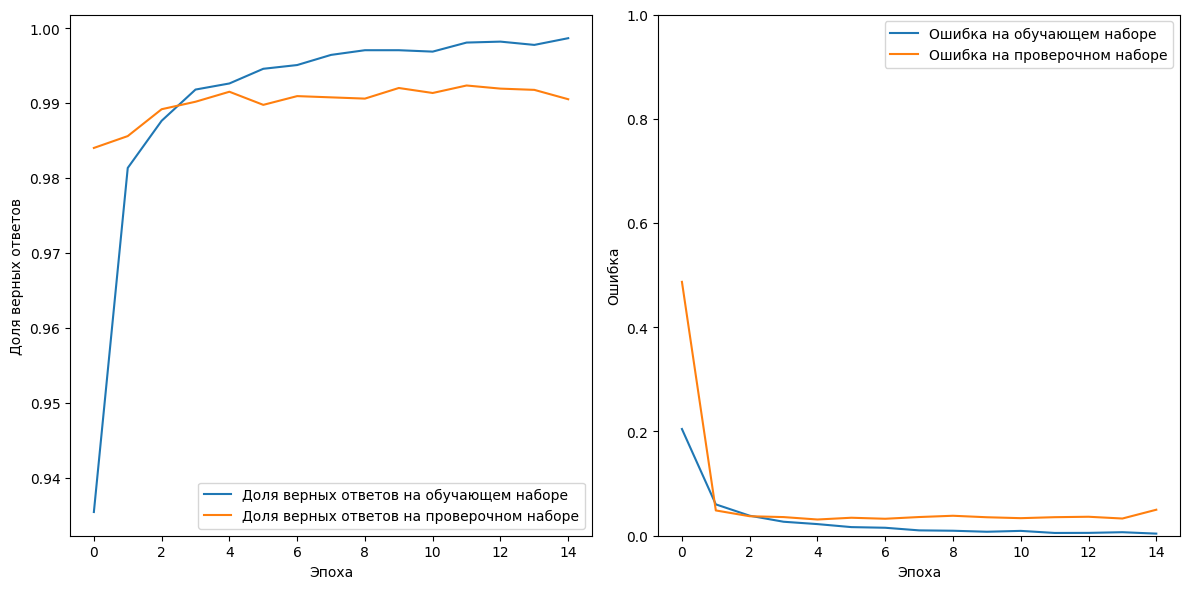

In [25]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0].plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
axes[0].plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Доля верных ответов')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Ошибка на обучающем наборе')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [27]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.0373 - accuracy: 0.9894
Model 1 - Test Accuracy: 0.9894000291824341


## Вывод
Была создана модель НС, точность валидационной и тестовой выборок удовлетворительна
